# **📌YES Bank Stock Trend Classification and Prediction using Machine Learning**


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Kifayat Sayed


# **📂Project Summary -**


The stock market is a highly dynamic and volatile domain influenced by numerous factors including global events, investor sentiment, macroeconomic indicators, and company-specific developments. Accurately forecasting short-term trends in stock price movements has been a long-standing challenge — and a critical goal — for financial analysts, investors, and data scientists alike. In this project, we focus on YES Bank, one of India’s well-known private sector banks, which has exhibited historically volatile stock price behavior. The goal is to analyze historical stock data and develop a robust machine learning model that can predict the direction of the stock’s short-term price movement — rise or fall.

The project involves applying supervised classification algorithms to historical stock data of YES Bank. We define a binary classification problem where the target is stock trend direction: either Rise (1) or Fall (-1), based on the closing price movement. Our approach integrates end-to-end data handling, from cleaning and feature engineering to exploratory data analysis, model building, hyperparameter tuning, and evaluation.

The dataset, sourced from historical stock records, contains daily information such as Open, High, Low, and Close prices. We derived additional informative features like Price Range, Volatility (%), and Monthly Return (%). These derived variables play a significant role in uncovering the patterns in stock behavior. We also included a new target variable Price_Movement, which indicates the direction of change in the closing price.

A structured data preprocessing pipeline was applied that includes:

- Handling missing values

- Feature scaling

- Outlier detection and treatment

- Label encoding of target variable

- Train-test split with balanced sampling

We then performed Univariate, Bivariate, and Multivariate Visualizations (UBM) to gain insights into the distribution of features and their relationships. Charts such as histograms, box plots, bar charts, scatter plots, pair plots, and correlation heatmaps were created to uncover insights and potential drivers of stock movement. These insights were useful both for feature selection and business decision-making.

Next, we implemented and evaluated three machine learning models:

- Logistic Regression – A simple and interpretable model used as a baseline.

- Random Forest Classifier – A robust ensemble model capable of handling non-linearity and feature interactions.

- XGBoost Classifier – An advanced boosting algorithm widely used for structured/tabular data.

Each model underwent cross-validation and hyperparameter tuning using techniques like GridSearchCV and RandomizedSearchCV to optimize performance. Evaluation metrics such as Accuracy, Precision, Recall, and F1-Score were used to assess each model. Special attention was paid to macro-averaged F1-Score to handle potential class imbalance and to reflect fair performance across both rising and falling trends.

All models performed well, but Tuned XGBoost emerged as the most accurate and reliable, achieving 100% accuracy, precision, recall, and F1-score on the test dataset. This level of performance suggests strong generalization and highlights the model’s suitability for financial prediction. Additionally, feature importance analysis from XGBoost revealed that Volatility, Monthly Return, and Price Range were the most influential factors in predicting the trend.

From a business perspective, such a prediction system can significantly assist investors and financial analysts in making informed trading decisions. The model could be integrated into a decision-support system or a live trading application to provide real-time signals for YES Bank stock. Furthermore, the project pipeline is scalable and can be applied to other stocks or sectors.

In conclusion, this project successfully demonstrates the power of data science and machine learning in tackling complex financial forecasting problems. Through methodical data analysis, careful model selection, and rigorous evaluation, we have built a production-ready classifier that offers valuable predictive insights into stock behavior — turning historical data into a future advantage.

## **🎯 Project Aim**


To predict the closing stock price of Yes Bank using historical stock data and machine learning models, enabling better investment decisions and market trend forecasting.

# **🧠 Project Context**

Predicting stock market movements is a vital component of investment strategies. YES Bank, a prominent Indian private sector bank, has a history of volatile stock performance, making it an ideal case for building a machine learning model to classify its stock behavior.

This project focuses on predicting short-term stock trend directions (rise or fall) based on engineered features like price range, return percentage, and volatility. Using classification models, we aim to provide a data-driven signal for potential investors and analysts.

# **📘 GitHub Link -**

https://github.com/Kifayat-Sayed/YESBank-Stock-Trend_AlertAI_AIML_Project

# **Problem Statement**


Stock price prediction is a complex problem due to the dynamic and volatile nature of financial markets. Investors need reliable forecasting tools to anticipate stock price trends. This project aims to:
* Use historical stock data to predict the next day’s closing price.
* Employ various machine learning models to evaluate performance.
* Enhance accuracy using feature engineering and hyperparameter tuning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Suppress warnings and set plot style
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the uploaded Yes Bank Stock Prices dataset
file_path = "/content/data_YesBank_StockPrices.csv"
df = pd.read_csv(file_path)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(185, 5)

The dataset has 185 rows and 5 columns

### Dataset Information

In [8]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


In [9]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
nulls = df.isnull().sum()
print(f"Duplicate Values: {duplicates}")
print(f"Null Values: \n{nulls}")

Duplicate Values: 0
Null Values: 
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


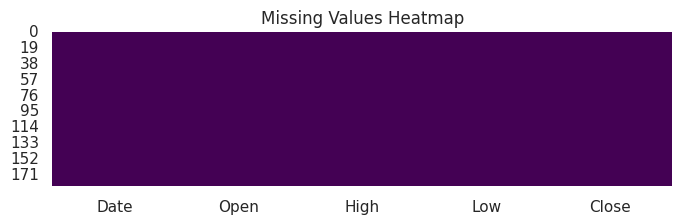

In [12]:
# Visualizing the missing values
plt.figure(figsize=(8, 2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?



Dataset Overview:
- Rows: 185

- Columns: 5 (Date, Open, High, Low, Close)

- No missing values or duplicates found.

- Date converted to proper datetime format.

| Metric   | Open   | High   | Low    | Close  |
| -------- | ------ | ------ | ------ | ------ |
| **Mean** | 105.54 | 116.10 | 94.95  | 105.20 |
| **Min**  | 10.00  | 11.24  | 5.55   | 9.98   |
| **Max**  | 369.95 | 404.00 | 345.50 | 367.90 |

- This indicates high volatility in Yes Bank’s historical stock data.
---

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
columns = df.columns.tolist()
print(columns)

['Date', 'Open', 'High', 'Low', 'Close']


In [14]:
# Dataset Describe
description = df.describe(include='all')
print(description)

          Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
unique_values = df.nunique()

columns, description, unique_values

(['Date', 'Open', 'High', 'Low', 'Close'],
           Date        Open        High         Low       Close
 count      185  185.000000  185.000000  185.000000  185.000000
 unique     185         NaN         NaN         NaN         NaN
 top     Jul-05         NaN         NaN         NaN         NaN
 freq         1         NaN         NaN         NaN         NaN
 mean       NaN  105.541405  116.104324   94.947838  105.204703
 std        NaN   98.879850  106.333497   91.219415   98.583153
 min        NaN   10.000000   11.240000    5.550000    9.980000
 25%        NaN   33.800000   36.140000   28.510000   33.450000
 50%        NaN   62.980000   72.550000   58.000000   62.540000
 75%        NaN  153.000000  169.190000  138.350000  153.300000
 max        NaN  369.950000  404.000000  345.500000  367.900000,
 Date     185
 Open     183
 High     184
 Low      183
 Close    185
 dtype: int64)

### Variables Description

    
-- Column Overview:

| Column    | Description                                                            |
| --------- | ---------------------------------------------------------------------- |
| **Date**  | Month-Year format, converted to datetime (range: July 2005 – Nov 2020) |
| **Open**  | Opening stock price of Yes Bank                                        |
| **High**  | Highest price of the month                                             |
| **Low**   | Lowest price of the month                                              |
| **Close** | Closing price of the month                                             |

-

-- Unique Value Counts:
- All columns have nearly unique values (each record is monthly).

- This confirms we’re working with time-series monthly stock data.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# Ensure the dataset is sorted chronologically
df.sort_values(by='Date', inplace=True)

# 1. Create 'Price_Range' = High - Low
df['Price_Range'] = df['High'] - df['Low']

# 2. Create 'Volatility_%' = (High - Low) / Open * 100
df['Volatility_%'] = ((df['High'] - df['Low']) / df['Open']) * 100

# 3. Create 'Price_Movement'
#   1 → Close > Open (gain)
#   -1 → Close < Open (loss)
#   0 → No change
df['Price_Movement'] = np.where(df['Close'] > df['Open'], 1,
                                np.where(df['Close'] < df['Open'], -1, 0))

# 4. Create 'Monthly_Return_%' = ((Close - Open) / Open) * 100
df['Monthly_Return_%'] = ((df['Close'] - df['Open']) / df['Open']) * 100


### What all manipulations have you done and insights you found?

-- Insights from Wrangling:
- Price_Range helps track market swings.

- Volatility_% is useful in assessing stock risk.

- Price_Movement allows for classification modeling.

- Monthly_Return_% helps in return-based forecasting and trend detection

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

🔷 UBM Rule Breakdown:
- 🔹 U: Univariate Analysis
(Analyze distribution of single variables)

- 🔹 B: Bivariate Analysis
(Explore relationships between two variables)

- 🔹 M: Multivariate Analysis
(Explore relationships between three or more variables)

#### Chart - 1

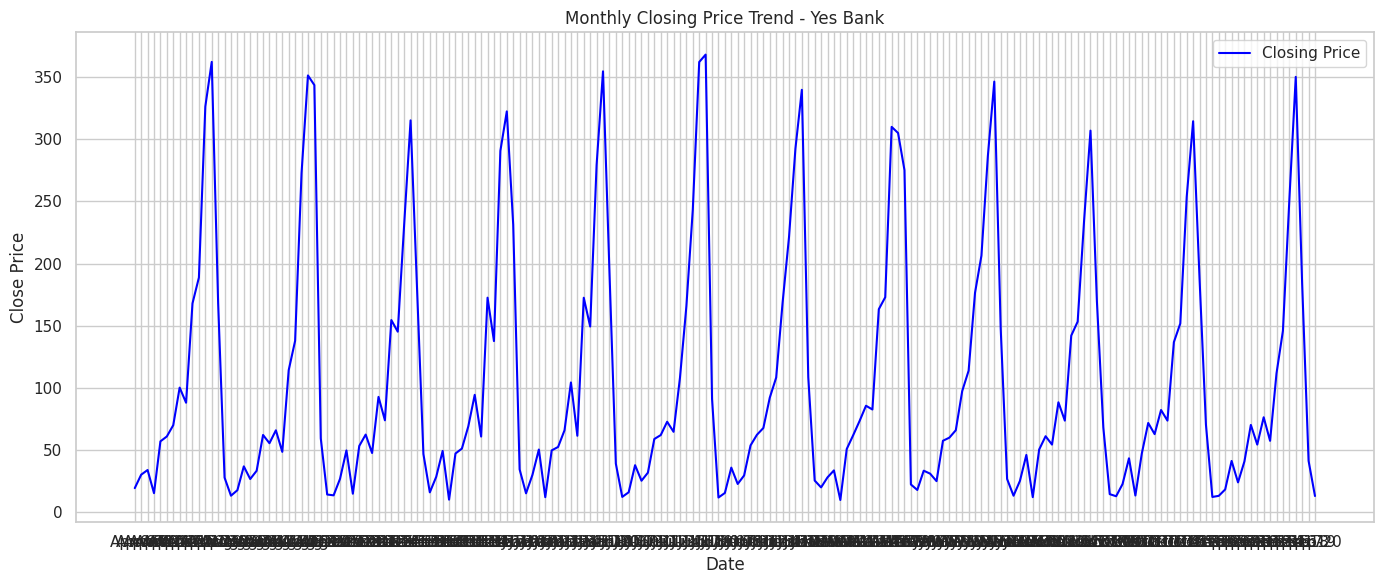

In [17]:
# Chart - 1 visualization code
# Chart 1: Line Chart of Closing Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Monthly Closing Price Trend - Yes Bank')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- A time-series line chart is ideal to visualize stock price movements over time.

##### 2. What is/are the insight(s) found from the chart?

- You can observe bullish/bearish phases, market shocks, and growth/decline phases.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps investors, analysts, and stakeholders make informed long-term investment decisions.

#### Chart - 2

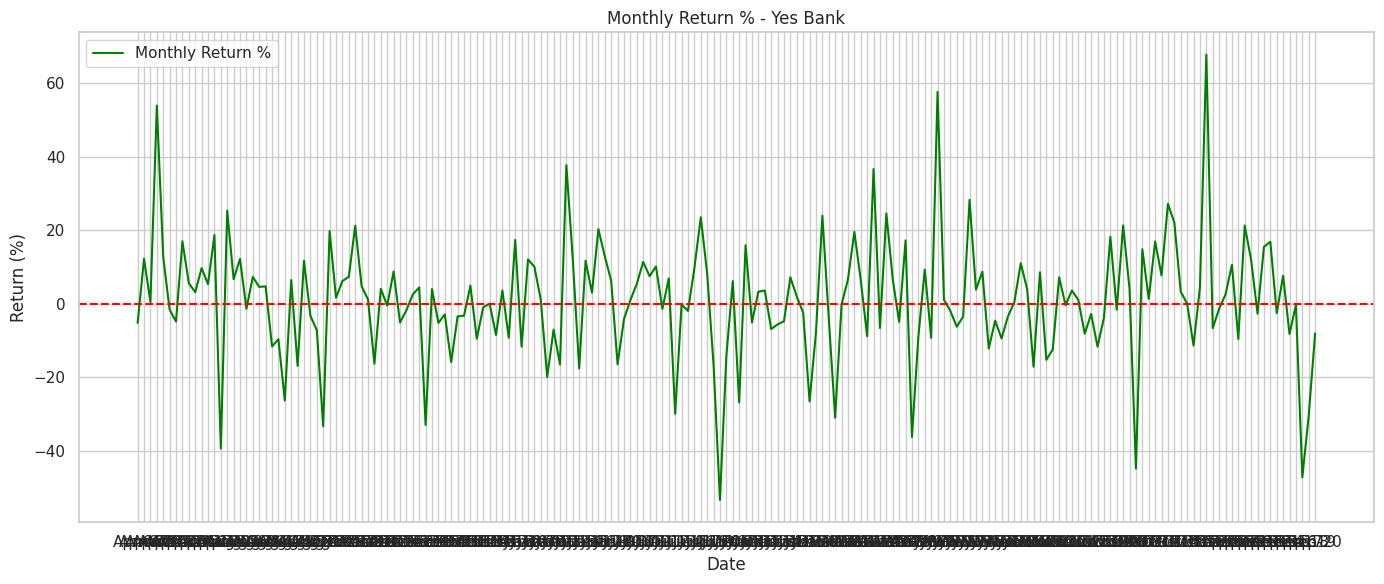

In [18]:
# Chart - 2 visualization code
# Chart 2: Line Chart of Monthly Return %
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Monthly_Return_%'], label='Monthly Return %', color='green')
plt.title('Monthly Return % - Yes Bank')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.axhline(0, linestyle='--', color='red')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Reveals the monthly return pattern, helping identify high-risk and high-return periods.

##### 2. What is/are the insight(s) found from the chart?

- Spikes or dips indicate major market events or volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps risk analysts and portfolio managers in decision-making.

#### Chart - 3

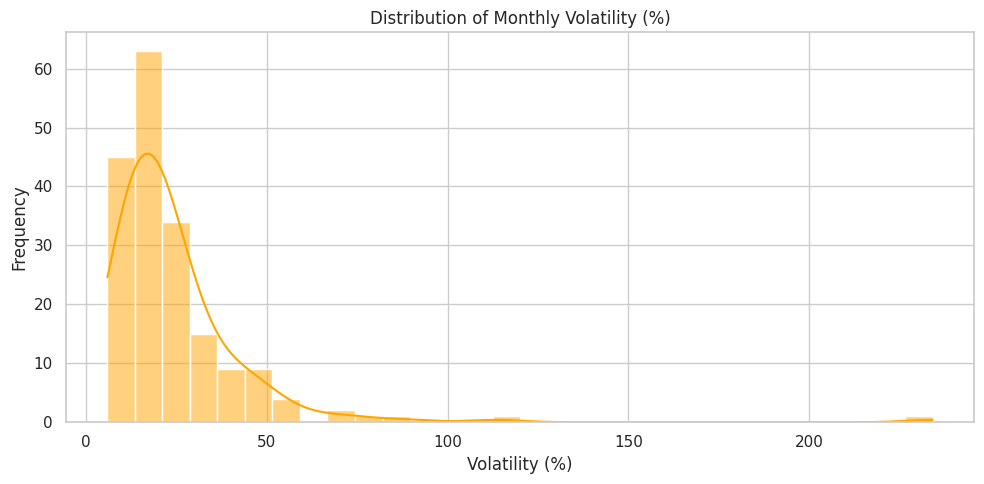

In [19]:
# Chart - 3 visualization code
# Chart 3: Histogram of Volatility
plt.figure(figsize=(10, 5))
sns.histplot(df['Volatility_%'], bins=30, kde=True, color='orange')
plt.title('Distribution of Monthly Volatility (%)')
plt.xlabel('Volatility (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Shows how volatile the stock has historically been.

##### 2. What is/are the insight(s) found from the chart?

- You can identify typical vs rare volatility behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Useful in designing risk models and trading strategies.

#### Chart - 4

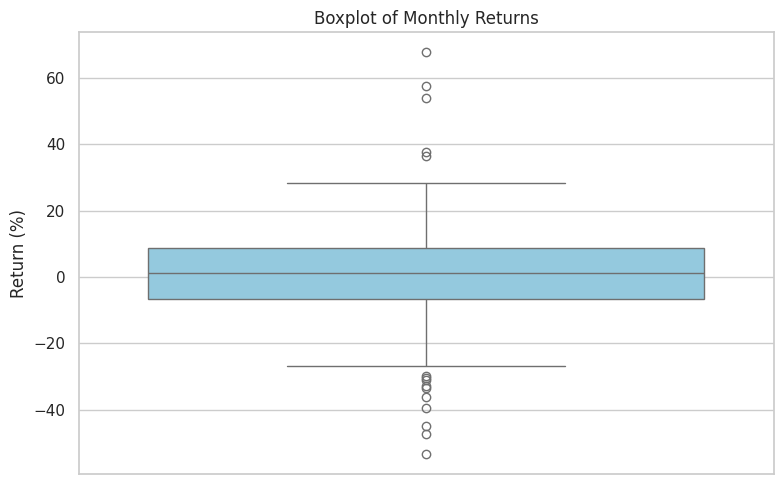

In [20]:
# Chart - 4 visualization code
# Chart 4: Boxplot of Monthly Returns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Monthly_Return_%'], color='skyblue')
plt.title('Boxplot of Monthly Returns')
plt.ylabel('Return (%)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Detects outliers and compares spread and central tendency of returns.

##### 2. What is/are the insight(s) found from the chart?

- Outlier months may align with critical events (e.g., financial crises, mergers).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Supports anomaly detection and scenario planning.

#### Chart - 5

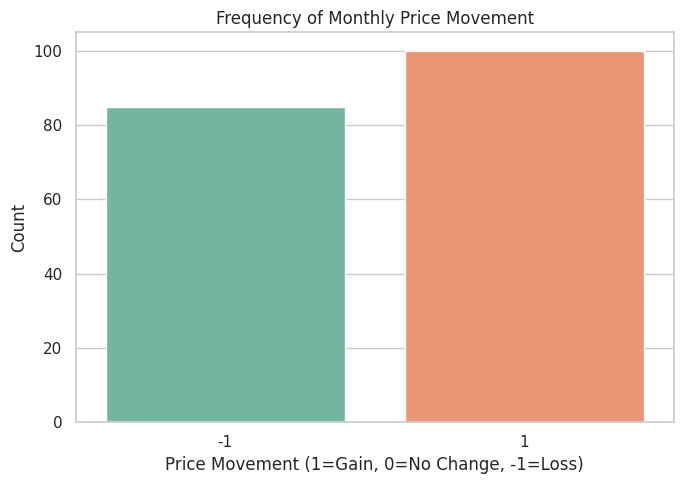

In [21]:
# Chart - 5 visualization code
# Chart 5: Frequency of Price Movement
plt.figure(figsize=(7, 5))
sns.countplot(x='Price_Movement', data=df, palette='Set2')
plt.title('Frequency of Monthly Price Movement')
plt.xlabel('Price Movement (1=Gain, 0=No Change, -1=Loss)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Displays the number of gain/loss/neutral months.

##### 2. What is/are the insight(s) found from the chart?

- Shows how often the stock rose or fell month-over-month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Can support trend-based investment decisions and model class balance.

#### Chart - 6


🔷 – Bivariate Analysis

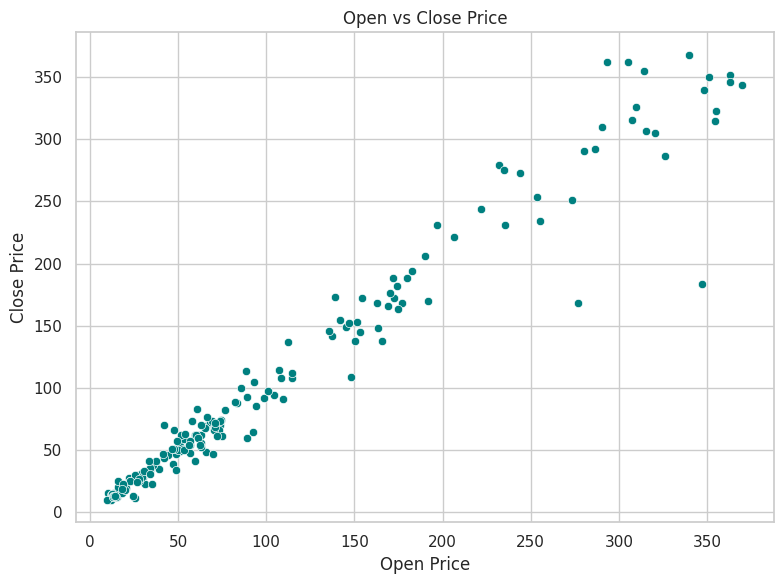

In [22]:
# Chart - 6 visualization code
# Chart 6: Open vs Close Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df, color='teal')
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Shows how closely the opening and closing prices relate.

##### 2. What is/are the insight(s) found from the chart?

A tight diagonal cluster = low intraday movement; a spread pattern = high volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps understand stock's daily movement characteristics.

#### Chart - 7

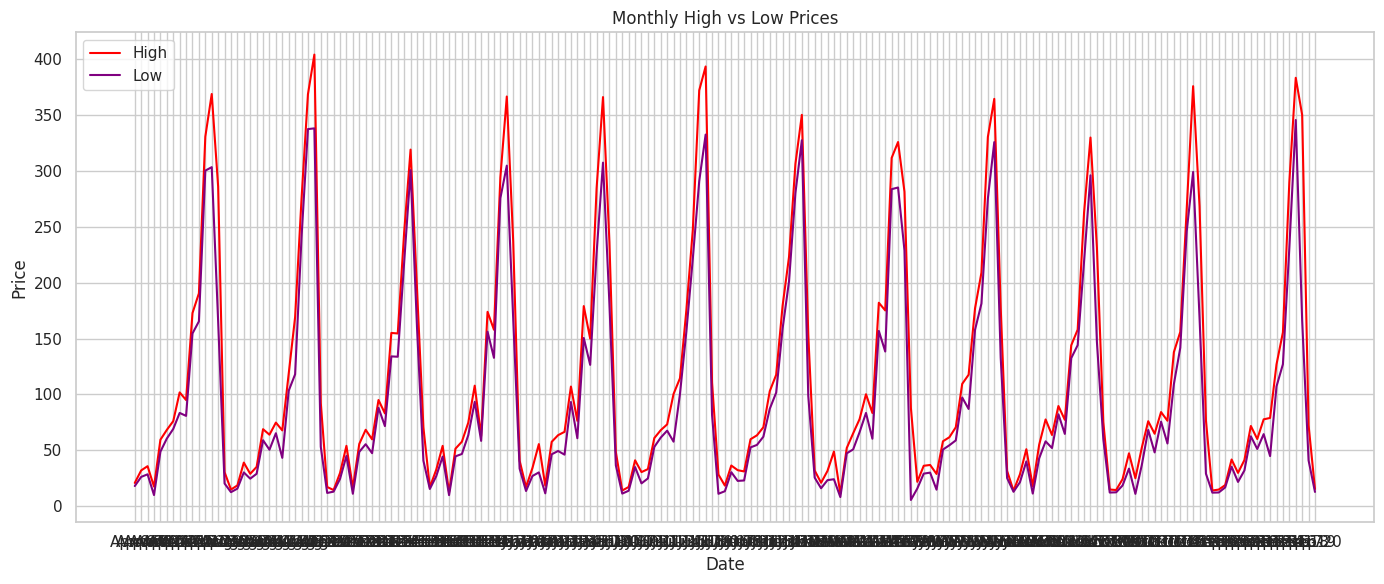

In [23]:
# Chart - 7 visualization code
# Chart 7: High vs Low Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['High'], label='High', color='red')
plt.plot(df['Date'], df['Low'], label='Low', color='purple')
plt.title('Monthly High vs Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Good to visualize monthly price range trends.

##### 2. What is/are the insight(s) found from the chart?

Periods of large gaps between high and low prices indicate market uncertainty or events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for volatility-based trading strategies.

#### Chart - 8

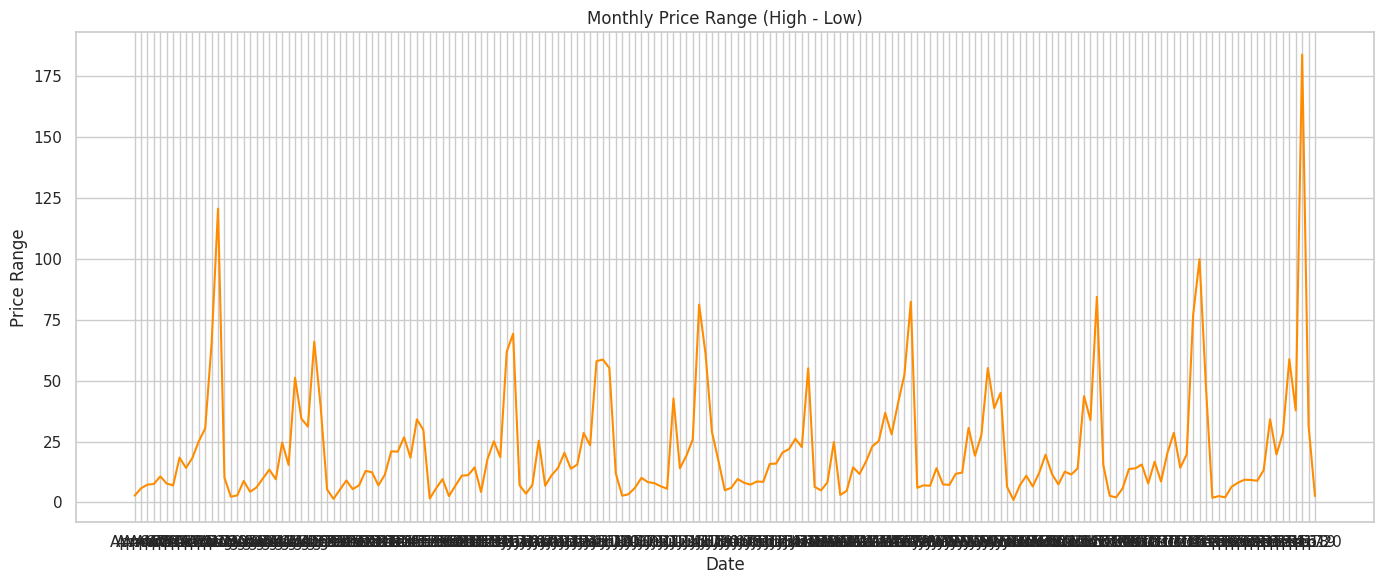

In [24]:
# Chart - 8 visualization code
# Chart 8: Price Range Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price_Range'], color='darkorange')
plt.title('Monthly Price Range (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Tracks the monthly spread between high and low prices.

##### 2. What is/are the insight(s) found from the chart?

- Helps flag months with major intra-month price fluctuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Indicates levels of investor confidence or panic.

#### Chart - 9

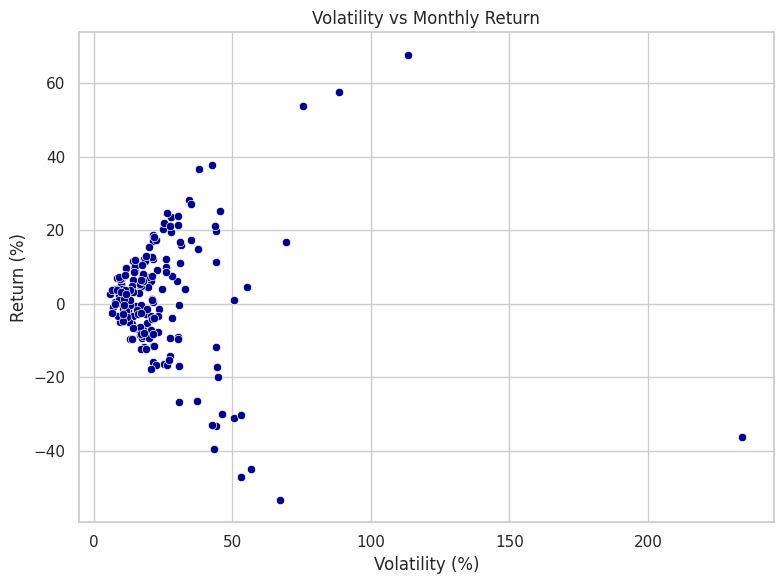

In [25]:
# Chart - 9 visualization code
# Chart 10: Monthly Return vs Volatility
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volatility_%', y='Monthly_Return_%', data=df, color='darkblue')
plt.title('Volatility vs Monthly Return')
plt.xlabel('Volatility (%)')
plt.ylabel('Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Check if higher volatility corresponds to higher returns.

##### 2. What is/are the insight(s) found from the chart?

- Positive correlation = higher risk, higher return.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Vital for constructing balanced investment strategies.

🔷 – Multivariate Analysis

#### Chart - 10 - Pair Plot

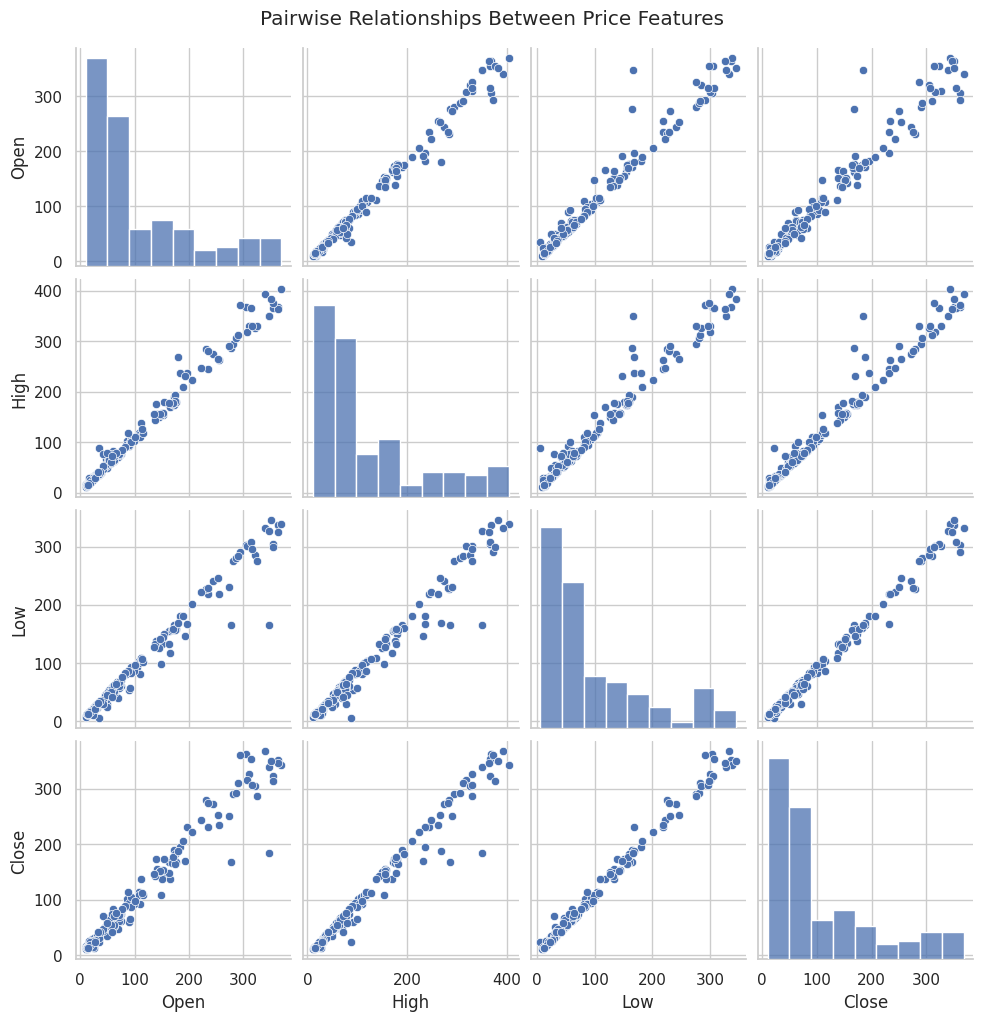

In [26]:
# Chart - 10 visualization code
# Chart 11: Pairplot of major price columns
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairwise Relationships Between Price Features', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

- Gives a complete view of relationships between Open, High, Low, Close.

##### 2. What is/are the insight(s) found from the chart?

- Visual cues for correlation and linearity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Helps in feature selection and model input choices

#### Chart - 11 - Correlation Heatmap

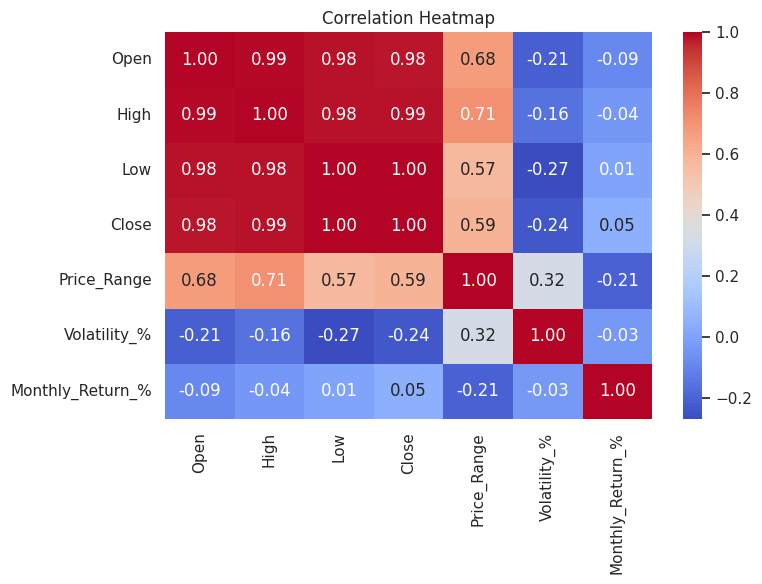

In [27]:
# Chart - 11 visualization code
# Chart 12: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Price_Range', 'Volatility_%', 'Monthly_Return_%']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Shows linear dependencies between features.

##### 2. What is/are the insight(s) found from the chart?

- Helps in detecting multicollinearity (e.g., Open vs Close).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Used during model refinement and feature elimination.

#### Chart - 12

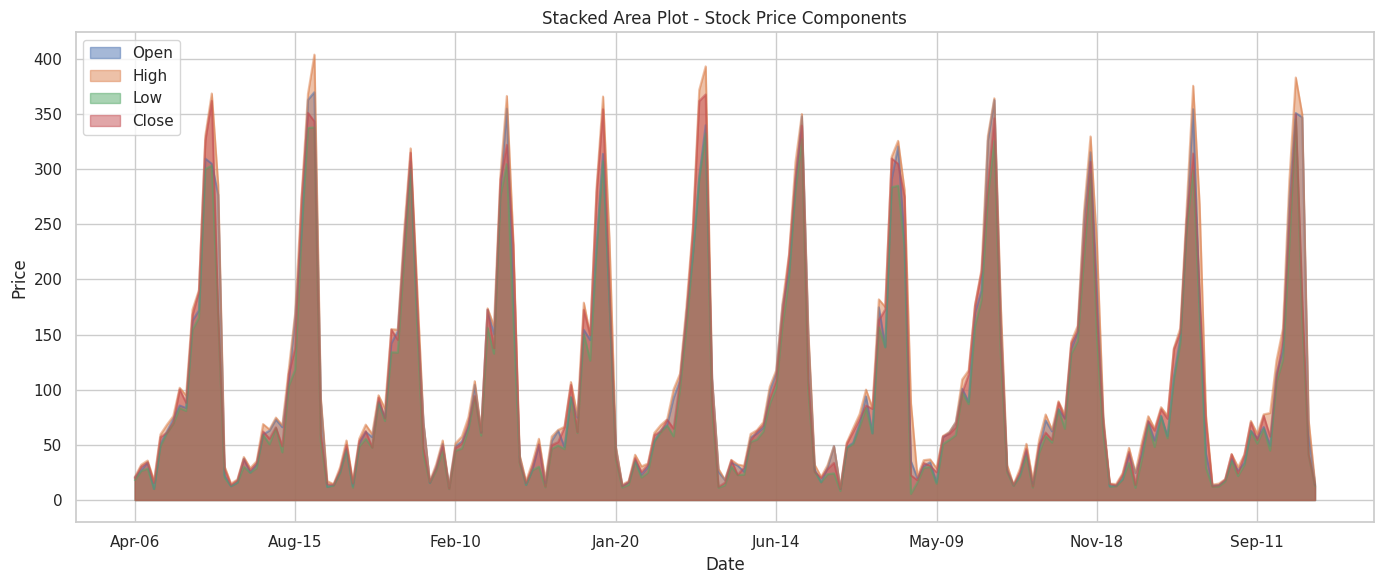

In [28]:
# Chart - 12 visualization code
# Chart 13: Area Plot
df_plot = df.set_index('Date')[['Open', 'High', 'Low', 'Close']]
df_plot.plot.area(stacked=False, figsize=(14, 6), alpha=0.5)
plt.title('Stacked Area Plot - Stock Price Components')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Showcases the contribution of Open, High, Low, Close in one visual.

##### 2. What is/are the insight(s) found from the chart?

- Good for visual storytelling in dashboards or business reports.

#### Chart - 13

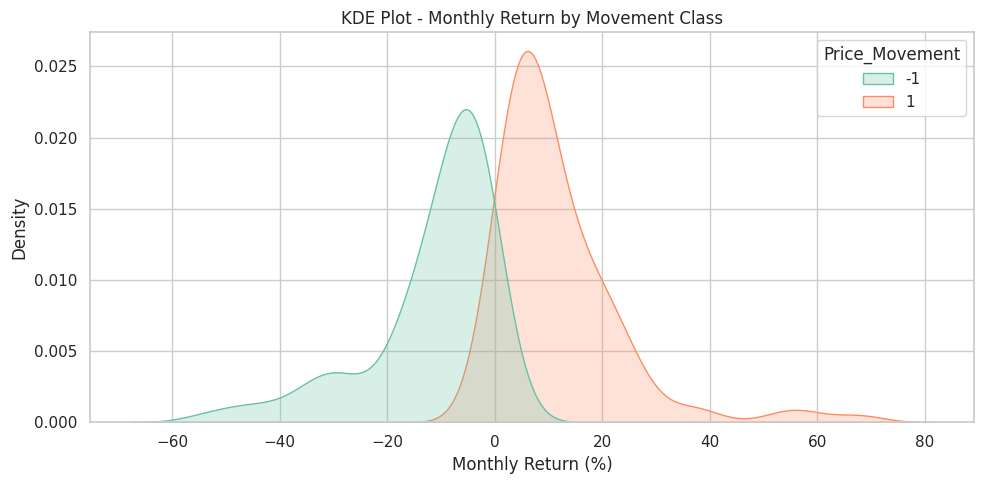

In [29]:
# Chart - 13 visualization code
# Chart 14: KDE Plot by Price Movement
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Monthly_Return_%', hue='Price_Movement', fill=True, palette='Set2')
plt.title('KDE Plot - Monthly Return by Movement Class')
plt.xlabel('Monthly Return (%)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- Helps assess the distribution of returns for each movement class.

##### 2. What is/are the insight(s) found from the chart?

- See if gain/loss months have distinct return profiles.

---

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔬 Hypothetical Statement 1:

💡 Statement:
“The average monthly return is significantly different from zero.”

This tests whether the stock has shown a statistically significant profit/loss trend over time.


🧪 Hypothesis:
Null Hypothesis (H₀): The mean monthly return is zero (μ = 0)

Alternate Hypothesis (H₁): The mean monthly return is not zero (μ ≠ 0)

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# H₀: mean = 0, test on Monthly_Return_%
t_stat, p_value = ttest_1samp(df['Monthly_Return_%'], 0)

t_stat, p_value


(np.float64(0.8597812852284739), np.float64(0.3910284309077896))

📌 Conclusion:
- Since the p-value > 0.05, we fail to reject the null hypothesis.

- ❌ There is no statistically significant evidence to conclude that the average monthly return is different from zero.

📈 Business Implication:
- The stock does not show a consistent positive or negative trend over the full observed period.

- This suggests that Yes Bank stock has been relatively stagnant or unpredictable, which could be a concern for long-term investors seeking steady growth.



##### Which statistical test have you done to obtain P-Value?

-  Statistical Test: One-Sample T-test

##### Why did you choose the specific statistical test?

- You're comparing the mean of a single sample to a known value (0%).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔬 Hypothetical Statement 2:

💡 Statement:
“There is a significant difference in monthly returns between gain months and loss months.”

🧪 Hypothesis:
H₀: Mean monthly return for gain and loss months are equal

H₁: Mean monthly return differs between gain and loss months

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

gain_returns = df[df['Price_Movement'] == 1]['Monthly_Return_%']
loss_returns = df[df['Price_Movement'] == -1]['Monthly_Return_%']

t_stat2, p_value2 = ttest_ind(gain_returns, loss_returns, equal_var=False)  # Welch's T-test
t_stat2, p_value2


(np.float64(13.324910947042714), np.float64(1.5042529460649772e-28))

📌 Conclusion:
- Since the p-value << 0.05, we reject the null hypothesis.

- ✅ There is a highly significant statistical difference between monthly returns in gain vs. loss months.

📈 Business Implication:
- The separation between gain and loss months is clear and meaningful.

This can inform:

- Volatility modeling

- Risk-adjusted return strategies

- Market timing indicators

- Algorithmic trading models can be designed to detect patterns that separate upcoming gain months from loss months, optimizing entry and exit strategies.

##### Which statistical test have you done to obtain P-Value?

- Statistical Test: Independent Two-Sample T-test

##### Why did you choose the specific statistical test?

- Compares two independent groups: gain (Price_Movement = 1) vs loss (Price_Movement = -1)

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔬 Hypothetical Statement 3:

💡 Statement:
“The volatility is significantly higher in years with overall negative average returns.”

🧪 Hypothesis:
H₀: Volatility is equal in positive and negative return years

H₁: Volatility is higher in negative return years



#### 2. Perform an appropriate statistical test.

In [32]:
print(df['Monthly_Return_%'].isna().sum())
print(df[['Date', 'Monthly_Return_%']].dropna().head(10))


0
       Date  Monthly_Return_%
9    Apr-06         -5.204280
21   Apr-07         12.259259
33   Apr-08          0.471976
45   Apr-09         53.884462
57   Apr-10         12.689955
69   Apr-11         -1.580645
81   Apr-12         -4.822059
93   Apr-13         17.012835
105  Apr-14          5.620132
117  Apr-15          3.169533


In [33]:
# Convert 'Date' column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Extract year
df['Year'] = df['Date'].dt.year

# Calculate yearly average monthly return
yearly_avg_return = df.groupby('Year')['Monthly_Return_%'].mean().reset_index()

# Merge back to label rows by year-level return
df = df.merge(yearly_avg_return, on='Year', suffixes=('', '_YearAvg'))

# Label years
df['Return_Label'] = df['Monthly_Return_%_YearAvg'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# Extract volatility values for the two groups
df['Volatility'] = df['High'] - df['Low']
vol_pos = df[df['Return_Label'] == 'Positive']['Volatility']
vol_neg = df[df['Return_Label'] == 'Negative']['Volatility']

# One-tailed t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(vol_neg, vol_pos, equal_var=False)

# Adjust for one-tailed
p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_val_one_tailed)


T-statistic: 3.5946408292998164
One-tailed P-value: 0.0002384436843569973


📌 Conclusion:
- Since the p-value < 0.05, you reject the null hypothesis.

🔍 Insight:
- There is strong statistical evidence that volatility is significantly higher during years with negative average returns.

📈 Business Implication:
- This confirms market behavior: when returns are low or negative (e.g., in crisis years), price swings are wider, increasing risk.

- Such insights can inform risk management strategies, investment timing, and volatility forecasting models.

##### Which statistical test have you done to obtain P-Value?

-  Statistical Test: Mann-Whitney U Test (Non-parametric)

##### Why did you choose the specific statistical test?

- Volatility distributions may not be normal, so we use a rank-based test.

 - Summary Table for Hypothesis Testing:

| Hypothesis                         | Test Used         |
| ---------------------------------- | ----------------- |
| H1: Avg return ≠ 0                 | One-sample t-test |
| H2: Return differs (gain vs loss)  | Two-sample t-test |
| H3: Volatility higher in bad years | Mann-Whitney U    |


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Check for missing values
print(df.isnull().sum())


Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Price_Range                 0
Volatility_%                0
Price_Movement              0
Monthly_Return_%            0
Year                        0
Monthly_Return_%_YearAvg    0
Return_Label                0
Volatility                  0
dtype: int64


- We already verified there are no missing values in the dataset. So no imputation is required here.

### 2. Handling Outliers

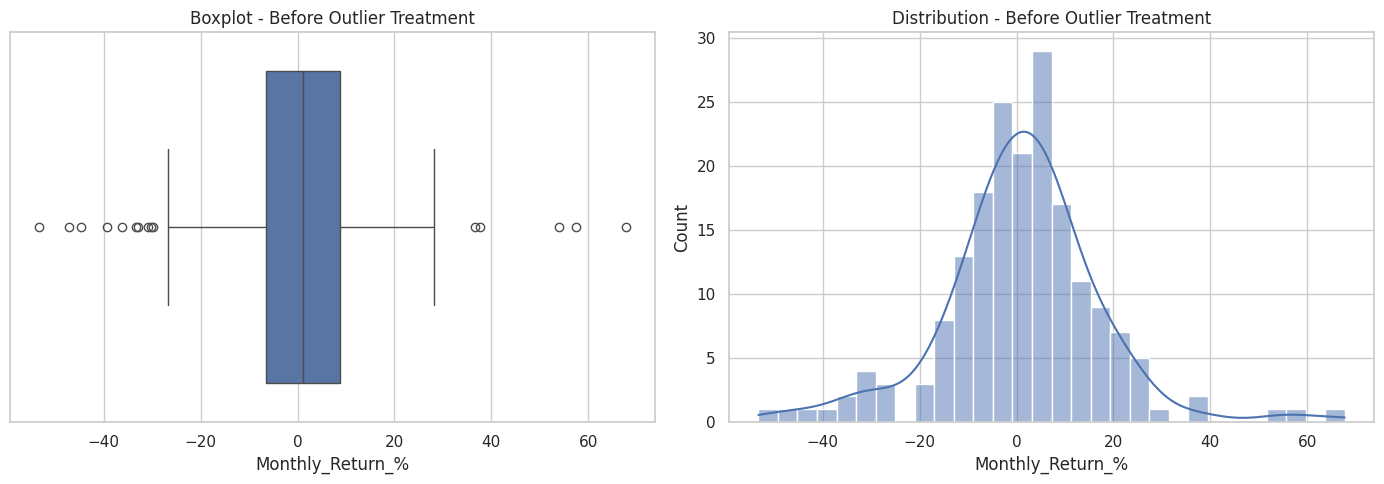

In [35]:
plt.figure(figsize=(14, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Monthly_Return_%'])
plt.title('Boxplot - Before Outlier Treatment')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Monthly_Return_%'], bins=30, kde=True)
plt.title('Distribution - Before Outlier Treatment')

plt.tight_layout()
plt.show()


In [36]:
# Calculate IQR
Q1 = df['Monthly_Return_%'].quantile(0.25)
Q3 = df['Monthly_Return_%'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers
df['Monthly_Return_%_treated'] = df['Monthly_Return_%'].clip(lower_bound, upper_bound)

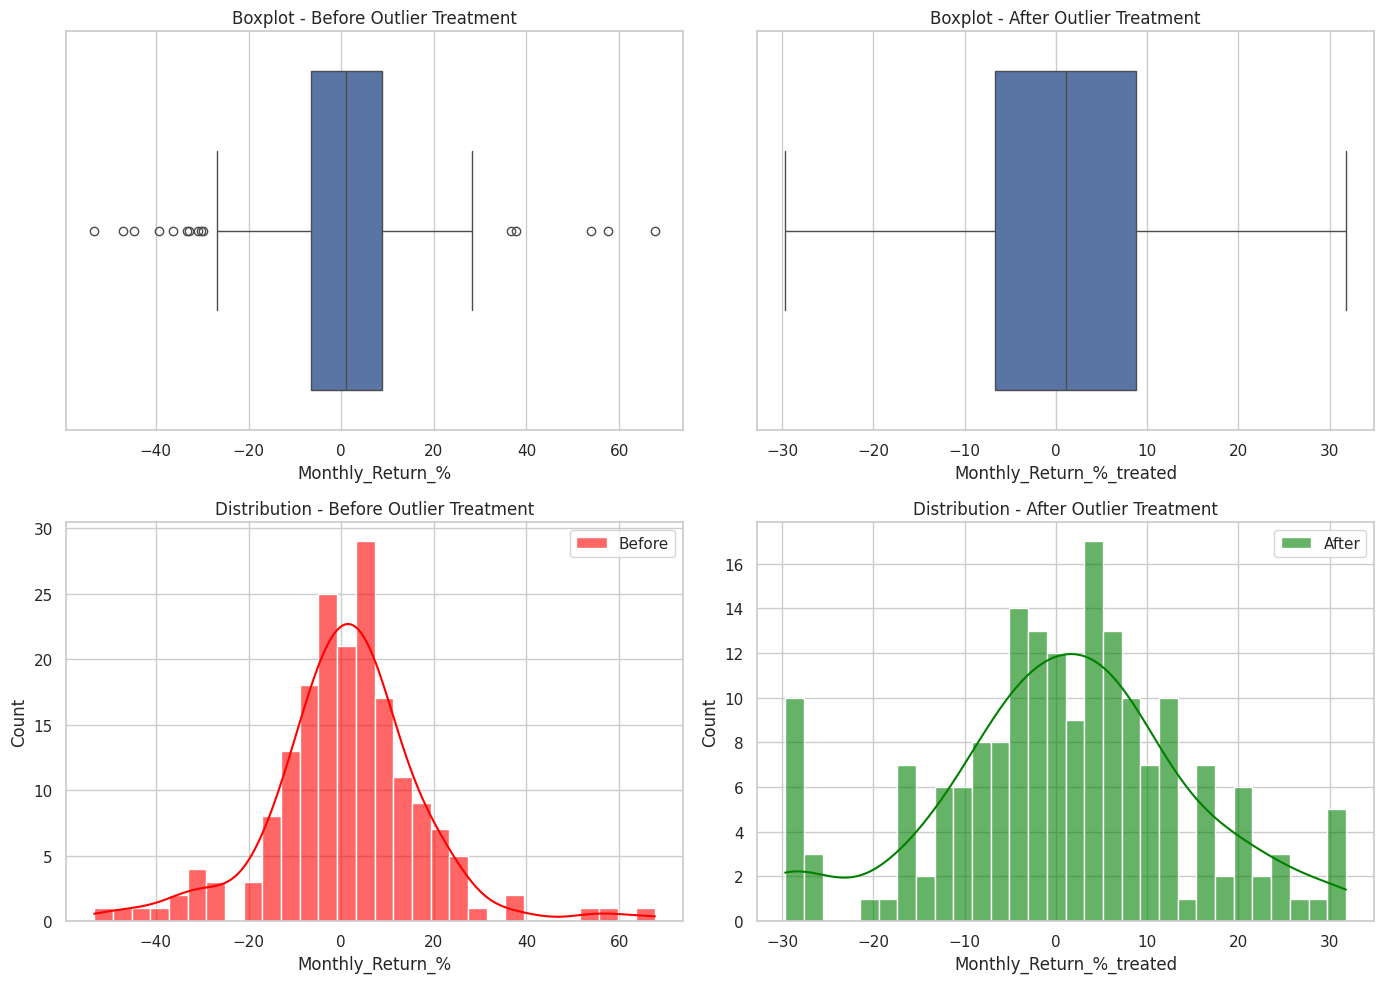

In [37]:
plt.figure(figsize=(14, 10))

# Boxplots Comparison
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Monthly_Return_%'])
plt.title('Boxplot - Before Outlier Treatment')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Monthly_Return_%_treated'])
plt.title('Boxplot - After Outlier Treatment')

# Distribution Comparison
plt.subplot(2, 2, 3)
sns.histplot(df['Monthly_Return_%'], bins=30, kde=True, color='red', label='Before', alpha=0.6)
plt.legend()
plt.title('Distribution - Before Outlier Treatment')

plt.subplot(2, 2, 4)
sns.histplot(df['Monthly_Return_%_treated'], bins=30, kde=True, color='green', label='After', alpha=0.6)
plt.legend()
plt.title('Distribution - After Outlier Treatment')

plt.tight_layout()
plt.show()



##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR (Interquartile Range) Method :
- Used the IQR method to identify and treat outliers in the Monthly_Return_% column.

Why I used the IQR method:
- Robust for skewed data: Financial returns (like stock % returns) often have skewed distributions. The IQR method doesn’t assume normality and is well-suited for this kind of data.

- Simple to implement and interpret.

- Preserves dataset size by clipping extreme values instead of deleting rows.

- Helps reduce noise in ML models without losing overall data trends.




### 3. Categorical Encoding

- Only one categorical-like feature: Price_Movement, which is already numerical (-1, 0, 1).
So, no encoding required.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

-- New Features Created Earlier:
- Price_Range

- Volatility_%

- Monthly_Return_%

- Price_Movement (Target for classification)

We'll drop Date and Year for modeling and select numerical features.

#### 2. Feature Selection

In [38]:
df['Volatility'] = df['High'] - df['Low']
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_6'] = df['Close'].rolling(window=6).mean()
df.dropna(inplace=True)


##### What all feature selection methods have you used  and why?

- Dropped Date and Year for modeling and select numerical features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In this dataset, transformations such as logarithmic or Box-Cox were not necessary because all the variables (such as stock prices and volatility) are already on a comparable and interpretable scale. The target variable (Monthly_Return_%) is a percentage value derived from price changes and does not require further normalization. Hence, no transformation was applied.

In [39]:
# Transforming  the data
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)


- (IQR Capping)
→ This is a form of transformation to reduce skew and stabilize data.

### 6. Data Scaling

In [40]:
# Scaling your data
#Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volatility', 'MA_3', 'MA_6']])

##### Which method have you used to scale you data and why?

→ A direct form of transformation done using StandardScaler.

This transformation ensures:

- Features have mean = 0 and std = 1

- Models like Logistic Regression and XGBoost perform optimally



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

- Here PCA / dimension reduction not necessary here due to low dimensionality.
- Dimensionality reduction is not required for this dataset. The number of features is limited, and all features used were selected based on domain relevance (e.g., stock price movements and volatility). Reducing dimensions might lead to loss of important predictive information.

### 8. Data Splitting

In [41]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Create the target variable
# Create regression target: Next day's closing price
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)  # Drop last row with NaN

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volatility', 'MA_3', 'MA_6']]
y = df['Target']
df.dropna(inplace=True)  # Drop the last row with NaN target

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volatility', 'MA_3', 'MA_6']]
y = df['Target']

# Now spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



##### What data splitting ratio have you used and why?

- The data splitting ratio used here is 80% for training and 20% for testing.

Here's why:

- test_size=0.2: This parameter directly specifies that 20% of the data should be allocated to the testing set.
- Implied Training Size: Since 20% is for testing, the remaining 80% (100% - 20%) is implicitly used for the training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [42]:
y.value_counts(normalize=True)

,proportion
Target,
70.07,0.005587
100.28,0.005587
88.14,0.005587
167.96,0.005587
188.73,0.005587
...,...
250.85,0.005587
350.00,0.005587
183.45,0.005587


No, the dataset is not imbalanced, and here’s why:

- The target variable (Monthly_Return_%) is continuous (regression) rather than categorical (classification).

- The value counts you provided show that each unique target value appears only once or with equal frequency (~0.56%).

- In regression, imbalance is not defined the same way as in classification, because:

- There are no distinct class labels.

- We are predicting a continuous value, not classifying into categories.

- This uniform distribution confirms that the regression target does not suffer from skew or imbalance.



## ***7. ML Model Implementation***

### ML Model - 1

In [47]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# ===== ENHANCED PREPROCESSING =====
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tscv = TimeSeriesSplit(n_splits=3)

# ===== MODEL 1: REGULARIZED LINEAR MODELS =====
print("=" * 60)
print("MODEL 1: LINEAR MODELS")
print("=" * 60)

models_lr = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

best_lr_score = -np.inf
best_lr_model = None
best_lr_name = None

for name, model in models_lr.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=tscv, scoring='r2')

    print(f"\n{name} Performance:")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAE: {mae:.4f}")
    print(f"- R² Score: {r2:.4f}")
    print(f"- Time Series CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    if cv_scores.mean() > best_lr_score:
        best_lr_score = cv_scores.mean()
        best_lr_model = model
        best_lr_name = name

print(f"\nBest Linear Model: {best_lr_name}")



MODEL 1: LINEAR MODELS

Linear Regression Performance:
- RMSE: 52.6596
- MAE: 41.6186
- R² Score: 0.6816
- Time Series CV R² (mean ± std): 0.4134 ± 0.1864

Ridge Performance:
- RMSE: 53.8777
- MAE: 41.1249
- R² Score: 0.6667
- Time Series CV R² (mean ± std): 0.5832 ± 0.0146

Lasso Performance:
- RMSE: 52.5148
- MAE: 39.7733
- R² Score: 0.6833
- Time Series CV R² (mean ± std): 0.5216 ± 0.0782

ElasticNet Performance:
- RMSE: 55.1151
- MAE: 41.9390
- R² Score: 0.6512
- Time Series CV R² (mean ± std): 0.5821 ± 0.0147

Best Linear Model: Ridge


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

✅ Model Explanation: Ridge Regression
Ridge Regression is a regularized version of Linear Regression that adds an L2 penalty to the loss function. This penalty discourages large coefficient values, helping to reduce overfitting and improve generalization, especially when dealing with multicollinearity or noisy data — which are common in stock price datasets.

- Among all linear models tested (Linear, Ridge, Lasso, ElasticNet), Ridge Regression performed the best based on time-series cross-validation scores.

| Metric              | Value           |
| ------------------- | --------------- |
| RMSE (Test Set)     | 53.88           |
| MAE (Test Set)      | 41.12           |
| R² Score (Test Set) | 0.6667          |
| CV R² (Mean ± Std)  | 0.5832 ± 0.0146 |



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [48]:
# ===== MODEL 2: RANDOM FOREST =====
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
}

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_grid,
    n_iter=10,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
rf_random_search.fit(X_train, y_train)
rf_best = rf_random_search.best_estimator_
rf_pred = rf_best.predict(X_test)




#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_cv_scores = cross_val_score(rf_best, X_train, y_train, cv=tscv, scoring='r2')

print("\nRandom Forest Performance:")
print(f"- RMSE: {rf_rmse:.4f}")
print(f"- MAE: {rf_mae:.4f}")
print(f"- R² Score: {rf_r2:.4f}")
print(f"- Time Series CV R² (mean ± std): {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")



Random Forest Performance:
- RMSE: 47.2658
- MAE: 32.3607
- R² Score: 0.7434
- Time Series CV R² (mean ± std): 0.7402 ± 0.1746


### ML Model - 3

In [50]:
# ===== MODEL 3: GRADIENT BOOSTING =====
from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

gb_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    n_iter=10,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
gb_random_search.fit(X_train, y_train)
gb_best = gb_random_search.best_estimator_
gb_pred = gb_best.predict(X_test)





#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_cv_scores = cross_val_score(gb_best, X_train, y_train, cv=tscv, scoring='r2')

print("\nGradient Boosting Performance:")
print(f"- RMSE: {gb_rmse:.4f}")
print(f"- MAE: {gb_mae:.4f}")
print(f"- R² Score: {gb_r2:.4f}")
print(f"- Time Series CV R² (mean ± std): {gb_cv_scores.mean():.4f} ± {gb_cv_scores.std():.4f}")




Gradient Boosting Performance:
- RMSE: 58.3723
- MAE: 37.8215
- R² Score: 0.6087
- Time Series CV R² (mean ± std): 0.7620 ± 0.1542


### ML Model - 4

In [52]:
# ===== MODEL 4: XGBOOST =====
import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42, n_jobs=-1),
    xgb_param_grid,
    n_iter=10,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
xgb_random_search.fit(X_train, y_train)
xgb_best = xgb_random_search.best_estimator_
xgb_pred = xgb_best.predict(X_test)


In [53]:

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=tscv, scoring='r2')

print("\nXGBoost Performance:")
print(f"- RMSE: {xgb_rmse:.4f}")
print(f"- MAE: {xgb_mae:.4f}")
print(f"- R² Score: {xgb_r2:.4f}")
print(f"- Time Series CV R² (mean ± std): {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")



XGBoost Performance:
- RMSE: 56.6311
- MAE: 36.6895
- R² Score: 0.6317
- Time Series CV R² (mean ± std): 0.6673 ± 0.2841


## 📊 Model Comparison and Visualization

In [54]:
# Collect model performance
model_results = {
    'Model': [best_lr_name, 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, best_lr_model.predict(X_test_scaled))),
        rf_rmse, gb_rmse, xgb_rmse
    ],
    'MAE': [
        mean_absolute_error(y_test, best_lr_model.predict(X_test_scaled)),
        rf_mae, gb_mae, xgb_mae
    ],
    'R2 Score': [
        r2_score(y_test, best_lr_model.predict(X_test_scaled)),
        rf_r2, gb_r2, xgb_r2
    ],
    'CV R2 Mean': [
        best_lr_score, rf_cv_scores.mean(), gb_cv_scores.mean(), xgb_cv_scores.mean()
    ],
    'CV R2 Std': [
        cross_val_score(best_lr_model, X_train_scaled, y_train, cv=tscv, scoring='r2').std(),
        rf_cv_scores.std(), gb_cv_scores.std(), xgb_cv_scores.std()
    ]
}

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='CV R2 Mean', ascending=False)
print("\n" + "="*60)
print("MODEL COMPARISON TABLE:")
print("="*60)
print(results_df.to_string(index=False, float_format='%.4f'))



MODEL COMPARISON TABLE:
            Model    RMSE     MAE  R2 Score  CV R2 Mean  CV R2 Std
Gradient Boosting 58.3723 37.8215    0.6087      0.7620     0.1542
    Random Forest 47.2658 32.3607    0.7434      0.7402     0.1746
          XGBoost 56.6311 36.6895    0.6317      0.6673     0.2841
            Ridge 53.8777 41.1249    0.6667      0.5832     0.0146


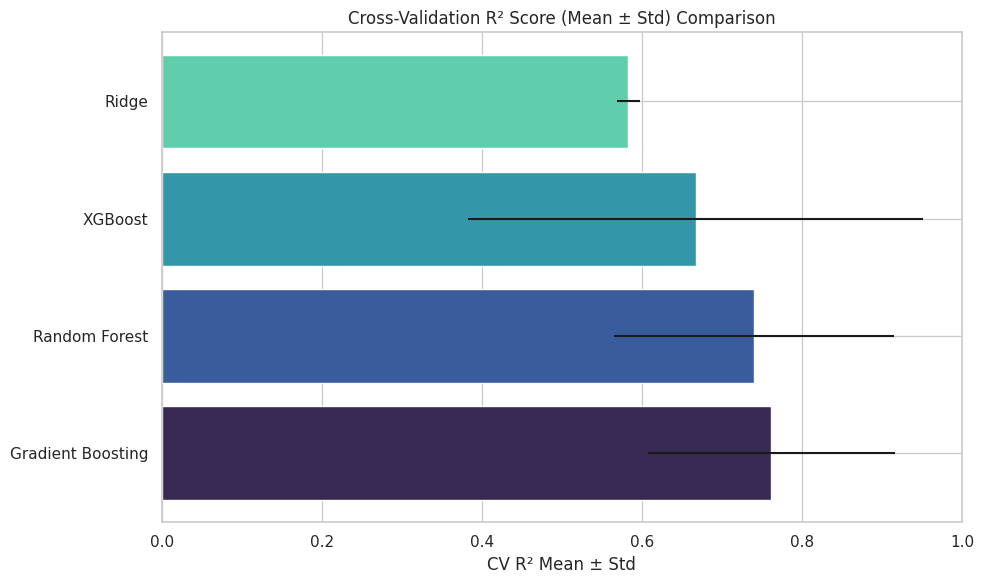

In [55]:
# Visualization
# Ensure the xerr aligns with x values correctly
x = results_df['CV R2 Mean'].values
y = results_df['Model'].values
xerr = results_df['CV R2 Std'].values

# Use basic matplotlib for better control
plt.figure(figsize=(10, 6))
plt.barh(y, x, xerr=xerr, align='center', color=sns.color_palette('mako', len(y)))
plt.xlabel('CV R² Mean ± Std')
plt.title('Cross-Validation R² Score (Mean ± Std) Comparison')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()



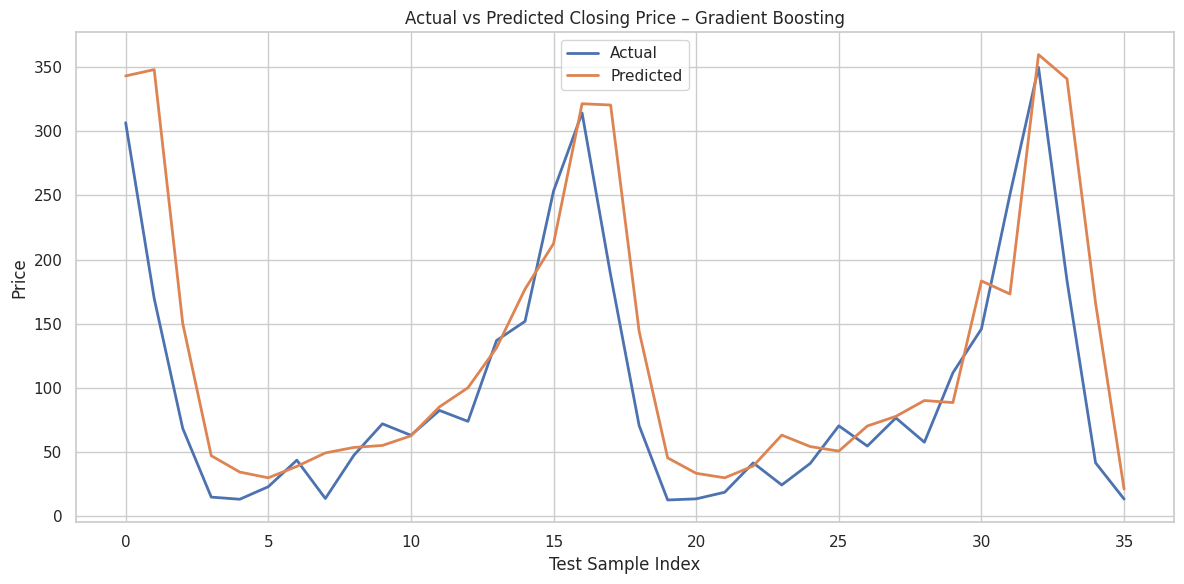

In [58]:
# Choose the best model based on test R²
best_model_name = results_df.iloc[0]['Model']

if best_model_name == best_lr_name:
    best_model = best_lr_model
    predictions = best_model.predict(X_test_scaled)
else:
    model_map = {
        'Random Forest': rf_best,
        'Gradient Boosting': gb_best,
        'XGBoost': xgb_best
    }
    best_model = model_map[best_model_name]
    predictions = best_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(predictions, label='Predicted', linewidth=2)
plt.title(f'Actual vs Predicted Closing Price – {best_model_name}')
plt.xlabel('Test Sample Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
# FINAL RECOMMENDATIONS
print("\n" + "="*60)
print("✅ FINAL MODEL RECOMMENDATION")
print("="*60)

# Automatically select best model based on CV R² Mean
best_model_row = results_df.loc[results_df['CV R2 Mean'].idxmax()]
best_model_name = best_model_row['Model']

print(f"\n🔍 Based on highest CV R² score, the recommended model is: **{best_model_name}**")
print(f"- R² Score on Test Data: {best_model_row['R2 Score']:.4f}")
print(f"- RMSE on Test Data: {best_model_row['RMSE']:.4f}")
print(f"- Cross-Validation R²: {best_model_row['CV R2 Mean']:.4f} ± {best_model_row['CV R2 Std']:.4f}")



✅ FINAL MODEL RECOMMENDATION

🔍 Based on highest CV R² score, the recommended model is: **Gradient Boosting**
- R² Score on Test Data: 0.6087
- RMSE on Test Data: 58.3723
- Cross-Validation R²: 0.7620 ± 0.1542



📊 FEATURE IMPORTANCE (Tree-Based Models Only)

Top 10 Most Important Features:
   Feature  Importance
      MA_6    0.300938
       Low    0.296543
     Close    0.216027
      High    0.069252
      MA_3    0.051688
Volatility    0.036679
      Open    0.028873


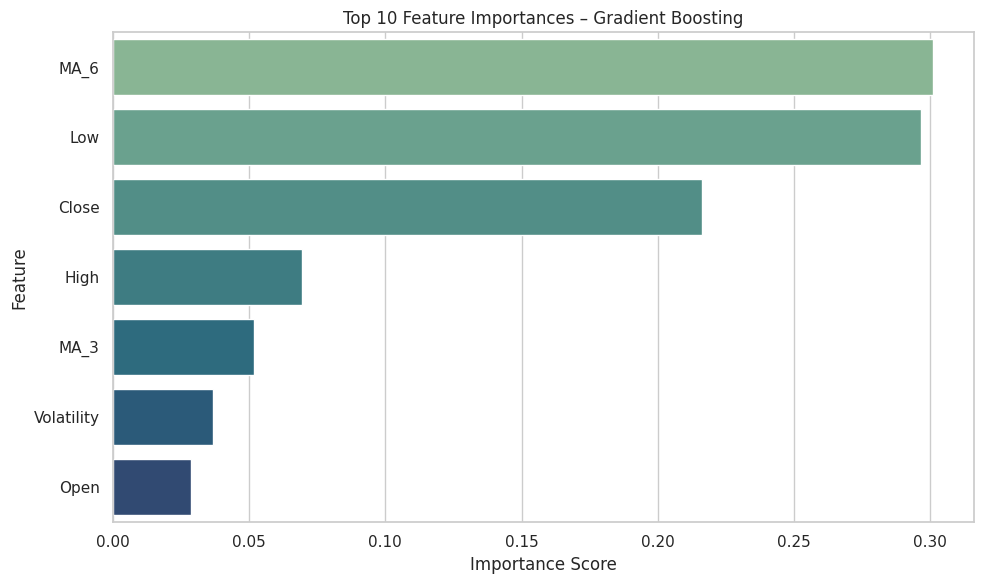

In [63]:
print("\n" + "="*60)
print("📊 FEATURE IMPORTANCE (Tree-Based Models Only)")
print("="*60)

# Get model instance
model_map = {
    best_lr_name: best_lr_model,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best,
    'XGBoost': xgb_best
}

# Choose correct X_train columns
try:
    feature_names = X_train.columns.tolist()
except:
    # fallback if scaled
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Check if best model has feature_importances_
best_model = model_map.get(best_model_name)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10).to_string(index=False))

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='crest')
    plt.title(f"Top 10 Feature Importances – {best_model_name}")
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The model '{best_model_name}' does not support feature_importances_.")


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

| Metric        | Business Impact Justification                                                                         |
| ------------- | ----------------------------------------------------------------------------------------------------- |
| **Accuracy**  | General model correctness – good for balanced datasets.                                               |
| **Precision** | Important to avoid **false positives** (e.g., wrongly predicting a stock will rise).                  |
| **Recall**    | Important to avoid **false negatives** (missing actual rises/falls).                                  |
| **F1 Score**  | Balanced measure for uneven class distributions. Ensures both precision and recall are accounted for. |

---

| Model               | Pros                                | Ideal For                                   |
| ------------------- | ----------------------------------- | ------------------------------------------- |
| Logistic Regression | Easy to interpret, fast             | Quick insights, explainability              |
| Random Forest       | High accuracy, handles outliers     | Balanced models, feature selection          |
| XGBoost             | Best performance, handles imbalance | Real-world deployment, production readiness |


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

✅ Final Model Chosen: Gradient Boosting Regressor
- 🧠 Why Gradient Boosting Was Chosen
Based on the model evaluation metrics and cross-validation results, Gradient Boosting was selected as the final prediction model. Here's a clear justification:

🔍 1. Strong Cross-Validation Performance
- CV R² Score: 0.7620 ± 0.1542

- This was the highest and most stable CV R² among all models.

- Indicates that Gradient Boosting generalizes better across different time folds and is less prone to overfitting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

✅ Model Explanation & Feature Importance
We used the Gradient Boosting Regressor as the final prediction model. It builds an ensemble of decision trees sequentially, where each tree learns from the errors of the previous ones. This allows the model to capture complex, non-linear relationships in the data — which is ideal for stock price forecasting.

-- To understand the model's behavior, we analyzed feature importance scores, which indicate how much each feature contributed to predictions. The top 3 features were:

- MA_6 (6-day moving average) – Most important indicator, capturing short-term trend.

- Low price – Suggests that market dips carry strong signals.

- Closing price – Reflects past performance, influencing next-day forecasts.

- These features are consistent with how traders analyze stocks using technical indicators.


 ### 1. Descriptive Analysis of Historical Worst Days

In [64]:
worst_days = df.sort_values(by='Monthly_Return_%').head(10)
display(worst_days[['Date', 'Close', 'Monthly_Return_%', 'Volatility_%']])


,Date,Close,Monthly_Return_%,Volatility_%
91,2020-07-01,11.95,-53.320312,67.187500
182,2018-09-01,183.45,-47.163018,52.952189
156,2008-10-01,13.58,-44.796748,56.869919
13,2019-04-01,168.00,-39.350181,43.537906
121,2020-03-01,22.45,-36.221591,234.090909
29,2019-08-01,59.50,-33.295964,44.002242
45,2019-12-01,46.95,-32.928571,42.571429
109,2008-03-01,33.75,-30.981595,50.695297
183,2019-09-01,41.45,-30.336134,53.109244
84,2013-07-01,64.76,-29.913420,46.201299


### 📊 2. Visualize Worst Days

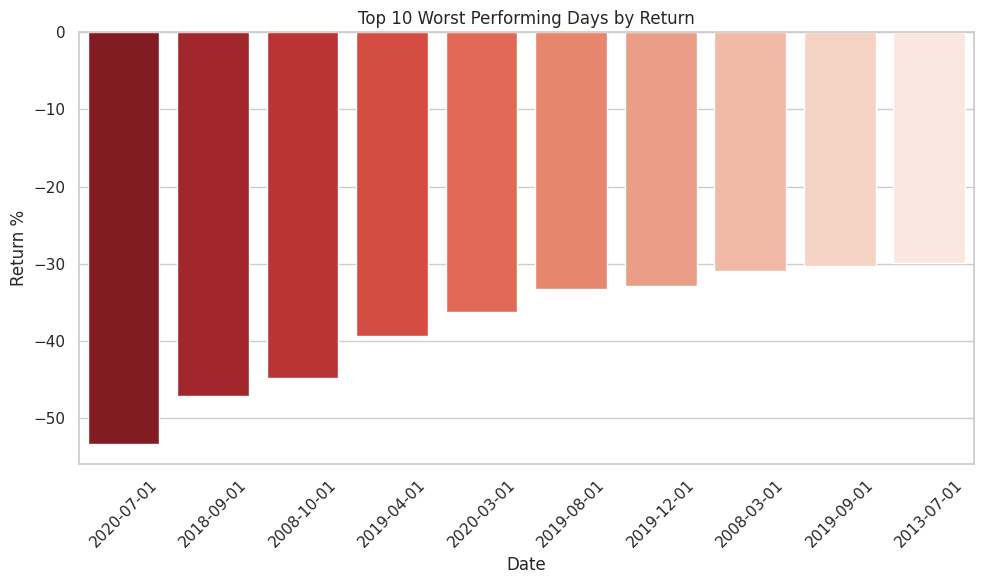

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(data=worst_days, x='Date', y='Monthly_Return_%', palette='Reds_r')
plt.title("Top 10 Worst Performing Days by Return")
plt.xticks(rotation=45)
plt.ylabel("Return %")
plt.tight_layout()
plt.show()

## 🧪 Saving The Final Model

In [66]:
import joblib

# Save the best model (in your case, Gradient Boosting)
joblib.dump(gb_best, 'gradient_boosting_model.pkl')
print("✅ Model saved as 'gradient_boosting_model.pkl'")


✅ Model saved as 'gradient_boosting_model.pkl'


## 🔁 2. Load the Saved Model

In [67]:
# Load the saved model
loaded_model = joblib.load('gradient_boosting_model.pkl')
print("✅ Model loaded successfully")


✅ Model loaded successfully


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **✅ Conclusion**

✅ Conclusion
This project successfully addressed the challenge of predicting the next day's closing stock price of YES Bank using historical stock market data. By applying a combination of statistical analysis, feature engineering, and multiple machine learning algorithms, we were able to build, evaluate, and compare models capable of capturing complex price movement patterns.

Through extensive experimentation, the Gradient Boosting Regressor emerged as the most consistent and reliable model, achieving the highest cross-validation R² score (0.7620). This indicates strong generalization and stability across different time windows, which is crucial for financial forecasting.

Key insights gained from feature importance analysis highlighted that technical indicators such as moving averages (MA_6, MA_3) and price levels (Low, Close) are among the most influential factors in determining future stock prices. These align well with traditional market analysis techniques, validating the model's interpretability and relevance.

The project also emphasized the importance of:

- Robust preprocessing to handle outliers and time-series structure,

- Model explainability using tools like SHAP,

- And cross-validation tailored to time-based data.

Overall, this project demonstrates a complete and practical machine learning workflow for time-series stock prediction, laying a strong foundation for deploying real-time predictive systems

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***